In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [183]:
tds=pd.read_csv('titanic_train.csv')
tds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
tds.shape

(891, 12)

In [185]:
tds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [186]:
tds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
tds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
tds['Survived'].isnull().sum()

0

In [189]:
tds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
# womens are more survived than men
print('Survived :\n',tds[tds['Survived']==1] ['Sex'].value_counts())
print('Dead :\n',tds[tds['Survived']==0] ['Sex'].value_counts())

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead :
 male      468
female     81
Name: Sex, dtype: int64


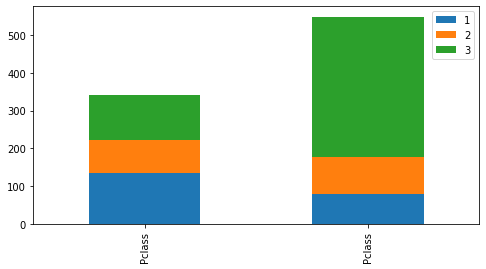

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead :
 3    372
2     97
1     80
Name: Pclass, dtype: int64


In [191]:
# 1st class more survived than other classes
# 3rd class more death than other classes
Survived=tds[tds['Survived']==1]['Pclass'].value_counts()
Dead=tds[tds['Survived']==0]['Pclass'].value_counts()
df1=pd.DataFrame([Survived,Dead])
df1.plot(kind='bar',stacked=True,figsize=(8,4))
plt.show()
print('Survived :\n',Survived)
print('Dead :\n',Dead)

In [192]:
# persons aboarded with more than two sbilings/spouse are more survived
# person aboarded without sibling/spouse more dead
print('Survived :\n', tds[tds['Survived']==1]['SibSp'].value_counts())
print('Dead :\n',tds[tds['Survived']==0]['SibSp'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead :
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


In [193]:
# persons aboarded with more than two parents/childrens are more survived
# person aboarded alone more likely dead
print('Survived :\n', tds[tds['Survived']==1]['Parch'].value_counts())
print('Dead :\n',tds[tds['Survived']==0]['Parch'].value_counts())

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead :
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


In [194]:
print('Survived :\n', tds[tds['Survived']==1]['Embarked'].value_counts())
print('Dead :\n',tds[tds['Survived']==0]['Embarked'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead :
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


In [195]:
tds.drop('Name',axis=1,inplace=True)

In [196]:
tds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
print('Survived :\n', tds[tds['Survived']==1]['Age'].value_counts())
print('Dead :\n', tds[tds['Survived']==0]['Age'].value_counts())

Survived :
 24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
Name: Age, Length: 65, dtype: int64
Dead :
 21.0    19
28.0    18
25.0    17
18.0    17
22.0    16
        ..
74.0     1
32.5     1
36.5     1
55.5     1
70.5     1
Name: Age, Length: 77, dtype: int64


In [198]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


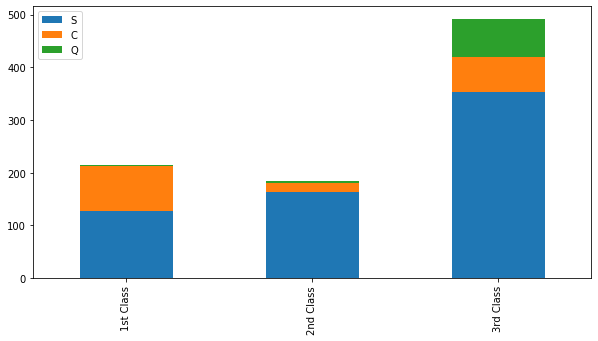

PClass1 :
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
PClass2 :
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
PClass3 :
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [199]:
Pclass1 = tds[tds['Pclass']==1]['Embarked'].value_counts()
Pclass2 =tds[tds['Pclass']==2]['Embarked'].value_counts()
Pclass3 = tds[tds['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index =[ '1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=True , figsize=(10,5))
plt.show()
print('PClass1 :\n',Pclass1)
print('PClass2 :\n',Pclass2)
print('PClass3 :\n',Pclass3)

In [200]:
tds.Embarked[tds.Embarked == 'S'] = 0
tds.Embarked[tds.Embarked == 'C'] = 1
tds.Embarked[tds.Embarked == 'Q'] = 2

In [201]:
tds.Sex[tds.Sex == 'male' ]= 0
tds.Sex[tds.Sex == 'female']=1

In [202]:
tds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0


In [203]:
# fill missing fare with median fare for each Pclass
tds['Fare'].fillna(tds.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [204]:
tds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0


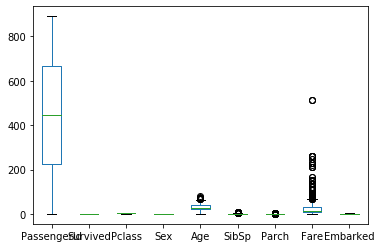

In [205]:
tds.plot(kind='box',stacked=True,layout=(2,11))

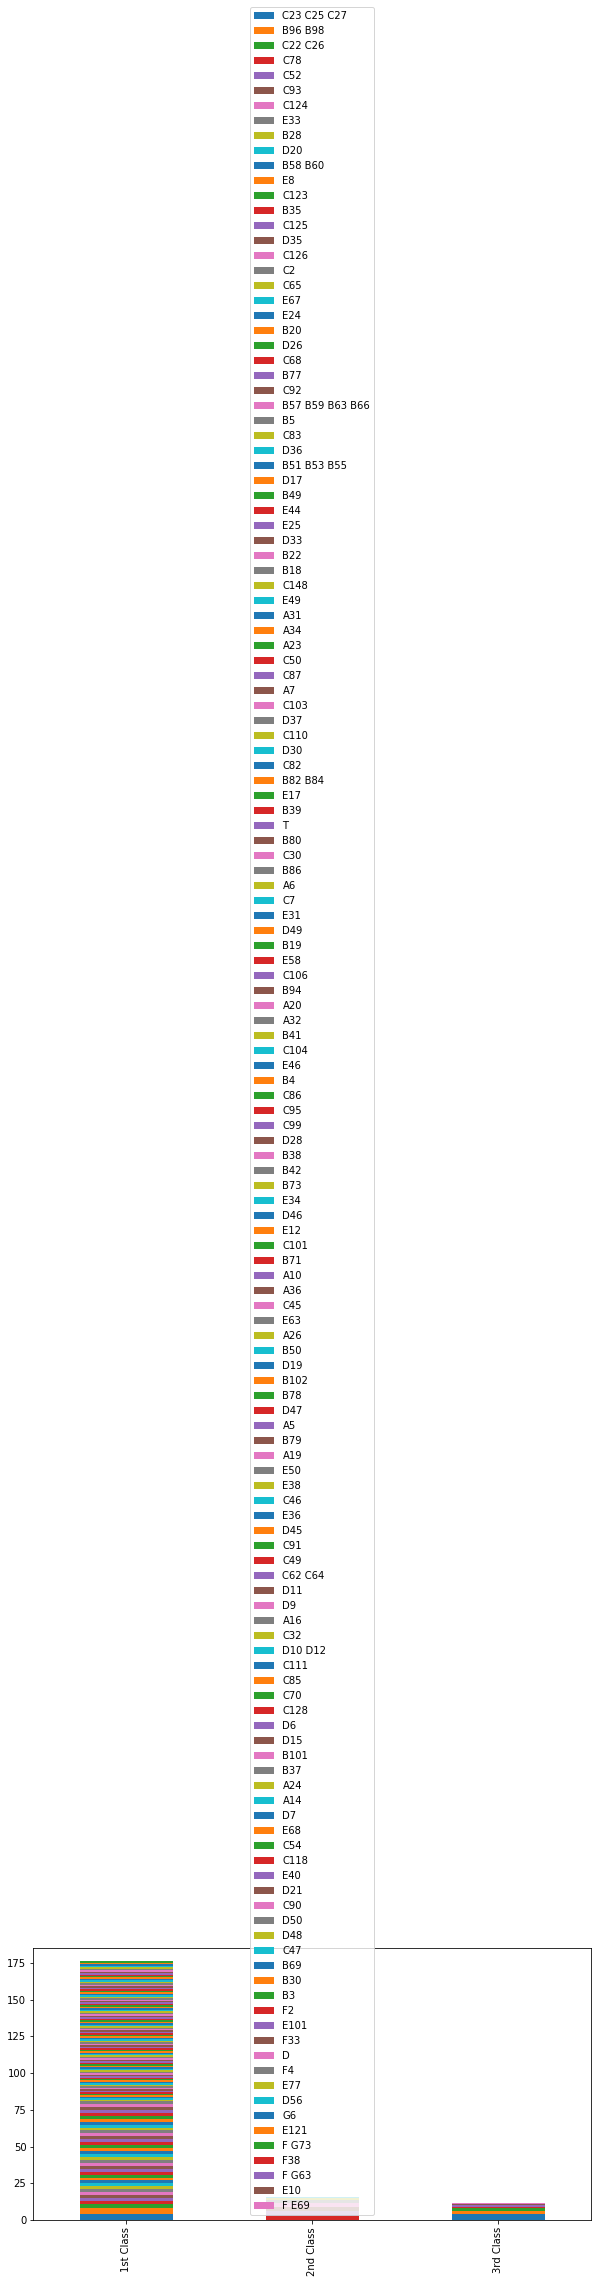

Pclass1 :
 C23 C25 C27    4
B96 B98        4
C22 C26        3
C78            2
C52            2
              ..
D48            1
C47            1
B69            1
B30            1
B3             1
Name: Cabin, Length: 133, dtype: int64
Pclass2 :
 F2      3
E101    3
F33     3
D       3
F4      2
E77     1
D56     1
Name: Cabin, dtype: int64
Pclass3 :
 G6       4
E121     2
F G73    2
F38      1
F G63    1
E10      1
F E69    1
Name: Cabin, dtype: int64


In [206]:
Pclass1 = tds[tds['Pclass']==1]['Cabin'].value_counts()
Pclass2 = tds[tds['Pclass']==2]['Cabin'].value_counts()
Pclass3 = tds[tds['Pclass']==3]['Cabin'].value_counts()
df2=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df2.index=['1st Class','2nd Class','3rd Class']
df2.plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()
print('Pclass1 :\n',Pclass1)
print('Pclass2 :\n',Pclass2)
print('Pclass3 :\n',Pclass3)

In [207]:
tds.drop('PassengerId',axis=1,inplace=True)

In [208]:
tds.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.539926
dtype: float64

In [209]:
tds['Sex'] = tds['Sex'].astype(int)

In [210]:
tds['FamilySize'] = tds['SibSp'] + tds['Parch'] + 1

In [211]:
tdscor=tds.corr()
tdscor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.065997
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.200988
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000


In [212]:
tds.FamilySize[tds.FamilySize == 1 ]=0 
tds.FamilySize[tds.FamilySize == 2 ]=0.4
tds.FamilySize[tds.FamilySize == 3 ]=0.8
tds.FamilySize[tds.FamilySize == 4 ]=1.2
tds.FamilySize[tds.FamilySize == 5 ]=1.6
tds.FamilySize[tds.FamilySize == 6 ]=2
tds.FamilySize[tds.FamilySize == 7 ]=2.4
tds.FamilySize[tds.FamilySize == 8 ]=2.8
tds.FamilySize[tds.FamilySize == 9 ]=3.2
tds.FamilySize[tds.FamilySize == 10 ]=3.4
tds.FamilySize[tds.FamilySize == 11 ]=4

In [213]:
tds['Age'].replace(np.NaN,tds['Age'].mean(),inplace=True)

In [214]:
tds['Embarked'].replace(np.NaN,tds['Embarked'].mean(),inplace=True)

In [215]:
tds['Embarked'] = tds['Embarked'].astype(int)

In [216]:
tds.drop('Cabin',axis=1,inplace=True)

In [217]:
tds.drop('Ticket',axis=1,inplace=True)

In [218]:
tds.drop('Parch',axis=1,inplace=True)

In [219]:
tds.drop('SibSp',axis=1,inplace=True)

In [220]:
tds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [222]:
tdscor=tds.corr()
tdscor

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.069809,0.257307,0.106811,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.331339,-0.549500,0.045702,0.065997
Sex,0.543351,-0.131900,1.000000,-0.084153,0.182333,0.116569,0.200988
Age,-0.069809,-0.331339,-0.084153,1.000000,0.091566,0.007461,-0.248512
Fare,0.257307,-0.549500,0.182333,0.091566,1.000000,0.062142,0.217138
Embarked,0.106811,0.045702,0.116569,0.007461,0.062142,1.000000,-0.080281
FamilySize,0.016639,0.065997,0.200988,-0.248512,0.217138,-0.080281,1.000000


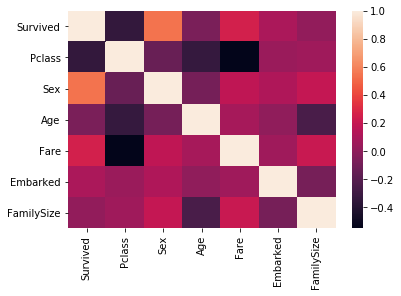

In [223]:
sns.heatmap(tdscor)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa45d15648>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa45d15708>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa45d049c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa45d0d3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa45d0e948>],
 'means': []}

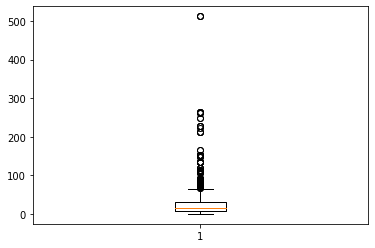

In [224]:
plt.boxplot(tds.Fare)

In [225]:
for col in tds.columns:
    if tds.skew().loc[col]>0.55:
        tds[col]=np.log1p(tds[col])

In [226]:
tds.skew()

Survived      0.478523
Pclass       -0.630548
Sex           0.618921
Age           0.434488
Fare          0.394928
Embarked      1.254648
FamilySize    1.572816
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa46081bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa460bcb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa46081308>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa46093ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa46093b88>],
 'means': []}

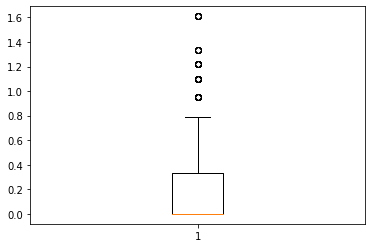

In [227]:
plt.boxplot(tds.FamilySize)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa46114e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa46102e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa46114408>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa46106f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa46106ec8>],
 'means': []}

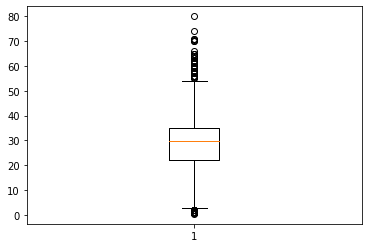

In [228]:
plt.boxplot(tds.Age)

In [229]:
from scipy.stats import zscore
z=np.abs(zscore(tds))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.87974057, 0.59463876,
        0.28949071],
       [1.2669898 , 1.56610693, 1.35557354, ..., 1.36121993, 1.23207231,
        0.28949071],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.79853997, 0.59463876,
        0.67117714],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.24200664, 0.59463876,
        1.57996144],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.48708246, 1.23207231,
        0.67117714],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.81898658, 2.30062978,
        0.67117714]])

In [230]:
threshold=3
print(np.where(z>3))

(array([ 59,  71,  96, 116, 159, 179, 180, 201, 258, 263, 271, 277, 302,
       324, 386, 413, 466, 480, 481, 493, 597, 630, 633, 672, 674, 678,
       679, 683, 732, 737, 745, 792, 806, 815, 822, 846, 851, 863],
      dtype=int64), array([6, 6, 3, 3, 6, 4, 6, 6, 4, 4, 4, 4, 4, 6, 6, 4, 4, 6, 4, 3, 4, 3,
       4, 3, 4, 6, 4, 6, 4, 4, 3, 6, 4, 4, 4, 6, 3, 6], dtype=int64))


In [231]:
tds_new=tds[(z<3).all(axis=1)]
tds_new

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0.000000,22.000000,2.110213,0.000000,0.336472
1,1,1,0.693147,38.000000,4.280593,0.693147,0.336472
2,1,3,0.693147,26.000000,2.188856,0.000000,0.000000
3,1,1,0.693147,35.000000,3.990834,0.000000,0.336472
4,0,3,0.000000,35.000000,2.202765,0.000000,0.000000
...,...,...,...,...,...,...,...
886,0,2,0.000000,27.000000,2.639057,0.000000,0.000000
887,1,1,0.693147,19.000000,3.433987,0.000000,0.000000
888,0,3,0.693147,29.699118,3.196630,0.000000,0.788457
889,1,1,0.000000,26.000000,3.433987,0.693147,0.000000


In [232]:
print(tds_new.shape)
print(tds.shape)

(853, 7)
(891, 7)


In [233]:
x=tds_new.iloc[:,0:-1]
x.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0.000000,22.0,2.110213,0.000000
1,1,1,0.693147,38.0,4.280593,0.693147
2,1,3,0.693147,26.0,2.188856,0.000000
3,1,1,0.693147,35.0,3.990834,0.000000
4,0,3,0.000000,35.0,2.202765,0.000000


In [234]:
y=tds_new.iloc[:,-1]
y.head()

0    0.336472
1    0.336472
2    0.000000
3    0.336472
4    0.000000
Name: FamilySize, dtype: float64

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [236]:
x_train.shape

(571, 6)

In [237]:
y_train.shape

(571,)

In [238]:
x_test.shape

(282, 6)

In [239]:
y_test.shape

(282,)

In [240]:
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [241]:
lg.coef_

array([-0.04177111,  0.2416128 ,  0.13278072, -0.00422913,  0.35013566,
       -0.06920949])

In [242]:
lg.intercept_

-1.2585492578486326

In [243]:
lg.score(x_train,y_train)

0.47244930870548496

In [244]:
tds_new.skew()

Survived      0.430009
Pclass       -0.642717
Sex           0.579481
Age           0.270384
Fare          0.950114
Embarked      1.225840
FamilySize    1.351898
dtype: float64

In [249]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state',r_state,'is:', r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('Max r2 is corresponding to ',final_r_state,'is',max_r_score)

r2_score corresponding to random state 42 is: 0.3954557404664283
r2_score corresponding to random state 43 is: 0.30011230334619654
r2_score corresponding to random state 44 is: 0.48996773020108275
r2_score corresponding to random state 45 is: 0.47490308246962654
r2_score corresponding to random state 46 is: 0.4632223032651074
r2_score corresponding to random state 47 is: 0.39372902179310443
r2_score corresponding to random state 48 is: 0.5137892960492874
r2_score corresponding to random state 49 is: 0.35827223169505196
r2_score corresponding to random state 50 is: 0.39354728492354096
r2_score corresponding to random state 51 is: 0.457747996100754
r2_score corresponding to random state 52 is: 0.40663129905134254
r2_score corresponding to random state 53 is: 0.1952739887277104
r2_score corresponding to random state 54 is: 0.4930101482310466
r2_score corresponding to random state 55 is: 0.4947701984925479
r2_score corresponding to random state 56 is: 0.428945478513143
r2_score correspondi

In [250]:
pred=lg.predict(x_test)
print('Predicted result price',pred)
print('actual price',y_test)

Predicted result price [ 0.40439108  0.05570312  0.73426032  0.06152324  0.3711326   0.44624168
  0.21454334  0.04257556  0.2826429   0.05764461  0.53499757  0.13849756
  0.22082218  0.16876482  0.45100133  0.70508279  0.13164833  0.21162628
  0.11195426  0.06278021 -0.01623157 -0.02436606  0.75540597  0.40612799
  0.41696898  0.07827619  0.34560154  0.64720874  0.07917979  0.04400479
  0.21635223  0.17946548  0.0743819   0.01145219  0.38564574 -0.01866806
  0.03451797  0.76884922  0.27989836  0.06023721  0.02980477  0.64039028
  0.14754414  0.44624168  0.11312279  0.30628713  0.105937    0.18859002
 -0.06710604  0.44243101  0.31365149  0.20004093  0.21234665  0.02609923
  0.29652156  0.85504875  0.18431582  0.15294269  0.39379113  0.02727139
  0.36074562  0.1515806   0.37246685  0.47217037  0.17167351  0.88839771
  0.34857841 -0.09364867  0.30628713  0.691834    0.14392186  0.5413067
  0.0795141   0.0218701   0.3003536   0.30028603  0.23091923  0.1139305
  0.0031802   0.26075519  0.21

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)
print('r2 score is :',r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.5772917066930305
RMSE is : 0.21164987506543032


In [252]:
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')

array([0.51193891, 0.47819849, 0.32761464, 0.43356536, 0.4200233 ])

In [253]:
from sklearn.externals import joblib
joblib.dump(lreg,'Titanic_Data.pkl')

['Titanic_Data.pkl']